In [1]:
stp ="*"
path = "/research/dabid/" 
#path = "C:/users/abidd/Documents/"
fname = "hg38transeq" 
dictpf = {}
npll = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0} #nbr of protein last line

with open(path + fname, 'r') as f: 
    for line in f:
        if line.find(">chr") != -1:
            frame= line[len(line)-2:len(line)-1]
            print line
            continue
        else:
            cpos = 0 #begining of line current position = 0
            ppos = 0 #previous position
            lcp = 0 #length current protein
            while ppos <= len(line):
                cpos = line.find(stp, ppos)
                if cpos == -1:
                    npll[frame] = npll[frame] +len(line) - ppos  
                    break
                else:
                    lcp = cpos - ppos + npll[frame]
                    if npll[frame] != 0:
                        npll[frame] = 0
                    if dictpf.get((frame, lcp)) is None:
                        dictpf[frame, lcp] = 1
                    else:
                        dictpf[frame, lcp] += 1

                    ppos = cpos + 1

for fr in ['1', '2', '3', '4', '5', '6']:
    dictpf[frame, npll[fr]] += 1

#print dictpf


>chr1_1

>chr1_2

>chr1_3

>chr1_4

>chr1_5

>chr1_6

>chr10_1

>chr10_2

>chr10_3

>chr10_4

>chr10_5

>chr10_6

>chr11_1

>chr11_2

>chr11_3

>chr11_4

>chr11_5

>chr11_6

>chr11_KI270721v1_random_1

>chr11_KI270721v1_random_2

>chr11_KI270721v1_random_3

>chr11_KI270721v1_random_4

>chr11_KI270721v1_random_5

>chr11_KI270721v1_random_6

>chr12_1

>chr12_2

>chr12_3

>chr12_4

>chr12_5

>chr12_6

>chr13_1

>chr13_2

>chr13_3

>chr13_4

>chr13_5

>chr13_6

>chr14_1

>chr14_2

>chr14_3

>chr14_4

>chr14_5

>chr14_6

>chr14_GL000009v2_random_1

>chr14_GL000009v2_random_2

>chr14_GL000009v2_random_3

>chr14_GL000009v2_random_4

>chr14_GL000009v2_random_5

>chr14_GL000009v2_random_6

>chr14_GL000225v1_random_1

>chr14_GL000225v1_random_2

>chr14_GL000225v1_random_3

>chr14_GL000225v1_random_4

>chr14_GL000225v1_random_5

>chr14_GL000225v1_random_6

>chr14_KI270722v1_random_1

>chr14_KI270722v1_random_2

>chr14_KI270722v1_random_3

>chr14_KI270722v1_random_4

>chr14_KI270722v1_random_5

>c

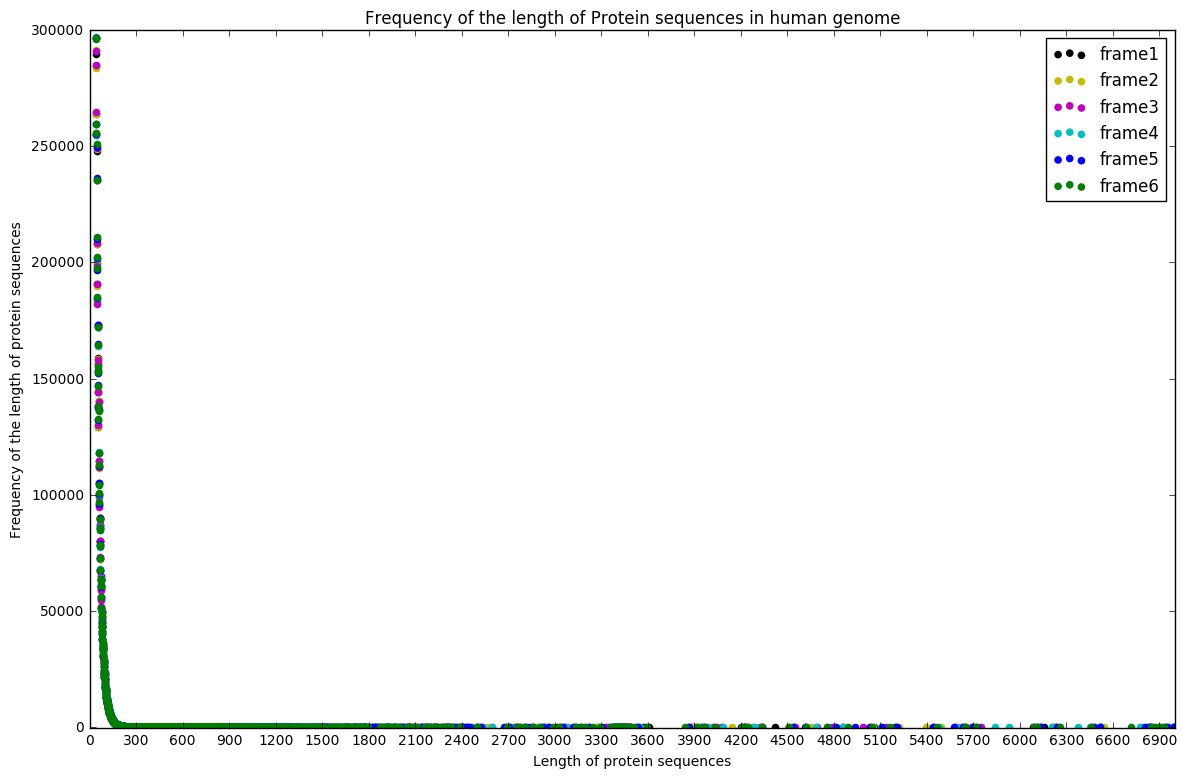

In [90]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np

d ={'1':{}, '2':{}, '3':{}, '4':{}, '5':{}, '6':{} }
for fr, pl in dictpf.keys():
    d[fr][pl] = dictpf[fr,pl]

#print d

colors = list("rgbcmyk")
fig = plt.figure(figsize=(14, 9), dpi=100)

for data_dict in d.values():
    x = data_dict.keys()
    y = data_dict.values()
    plt.scatter(x,y,color=colors.pop())

    
plt.title('Frequency of the length of Protein sequences in human genome')
plt.xlabel('Length of protein sequences')
plt.ylabel('Frequency of the length of protein sequences')


# set axes range
plt.xlim(0, 7000)
plt.ylim(-10, 300000)
plt.xticks(np.arange(0, 7000, 300))
plt.legend(['frame1', 'frame2', 'frame3', 'frame4', 'frame5', 'frame6'])
plt.savefig('plot.png')
plt.show()